## Data science snippets
### Gradient descent optimization algorithms 
### Vanilla gradient descent 
Given function $f(x, y)$, $x, y \in \mathbb{R}$.
The gradient descent update rule reads 
\begin{align}
    x_{i+1} &= x_{i} - r \dfrac{\partial f(x, y)}{\partial x}\Bigg|_{x=x_{i}} \\
    y_{i+1} &= y_{i} - r \dfrac{\partial f(x, y)}{\partial y}\Bigg|_{y=y_{i}} \\
\end{align}
where $r$ is a learning rate. This two level scheme (includes $x_{i}$ and $x_{i+1}$) possesses the zig-zag pattern when the curvature of $f(x, y)$ is more stepest in one direction than another.
To diminish this effect the memory about previous iterations can be introduced in the update rule
\begin{align}
    x_{i+1} &= x_{i} - z_{i} \\
    z_{i} &= r \dfrac{\partial f(x, y)}{\partial x}\Bigg|_{x=x_{i}} + \beta z_{i-1} \\
    y_{i+1} &= y_{i} - z_{i} \\
    z_{i} &= r \dfrac{\partial f(x, y)}{\partial y}\Bigg|_{y=y_{i}} + \beta z_{i-1} \\
\end{align}
where $\beta$ is constant. The introduced three level scheme adds inertia to the descent.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [205]:
# test function
tf = lambda x, y: - np.exp(-(x**2 + 3 * y**2)/40)
#tf = lambda x, y:  x**2 + y**2 + 10 * np.exp(-((x-1)**2 + (y-1)**2)) - 10 * np.exp(-((x+1)**2 + (y+1)**2)) # [1.8, 1.8]
#tf = lambda x, y: np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))

def grad2D(f: (), p: np.ndarray):
    """Gradient of function of two arguments f at point p=[x,y]."""
    d = 1e-5
    dfx = (f(p[0] + d, p[1]) - f(p[0], p[1])) / d
    dfy = (f(p[0], p[1] + d) - f(p[0], p[1])) / d
    return np.array([dfx, dfy])

def grad_desc(f: (), p0: np.ndarray):
    """Vanilla gradient descent."""
    # parameters 
    eps = 1e-7
    pi = 1e+5
    r = 1e-2
    diff = 1e+5
    iter = 0
    maxiter = 1e+4
    # trajectory 
    traj = []
    # calculation 
    while diff > eps and iter < maxiter:
        pi = p0 - r * grad2D(f, p0)
        diff = np.linalg.norm(pi - p0)
        p0 = pi
        iter += 1
        if iter == maxiter:
            print("Maximum iteration is reached")
        traj.append(pi)
    return np.array(traj)

def adam(f: (), p0: np.ndarray):
    """Adam otimization algorithm."""
    # parameters
    r = 1e-2 # learning rate
    b1 = 0.9 # exponential decay rates for the moment estimates
    b2 = 0.999 # exponential decay rates for the moment estimates
    diff = 1e+5
    maxiter = 1e+4
    eps = 1e-7
    e = 1e-8
    # trajectory 
    traj = []
    # initializate initial moments 
    m0 = 0
    v0 = 0
    iter = 0
    while diff > eps and iter < maxiter:
        iter += 1
        grad = grad2D(f, p0)
        m = b1 * m0 + (1 - b1) * grad # update biased first moment estimate
        v = b2 * v0 + (1 - b2) * grad**2 # update biased second raw moment estimate
        mt = m / (1 - b1**iter) # compute bias-corrected first moment estimate
        vt = v / (1 - b2**iter) # compute bias-corrected second raw moment estimate
        pi = p0 - r * mt / (np.sqrt(vt) + e) # update parameters
        diff = np.linalg.norm(pi - p0)
        p0 = pi
        m0 = m
        v0 = v
        if iter == maxiter:
            print("Maximum iteration is reached")
        traj.append(pi)
    return np.array(traj)

def display2D(f: (), trajects=dict):
    cmap = plt.cm.get_cmap('hsv', len(trajects))
    delta = 1e-2
    x = np.arange(-10.0, 10.0, delta)
    y = np.arange(-10.0, 10.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 4)
    ax.clabel(CS, inline=True, fontsize=10)
    if len(trajects) > 0:
        # ax.scatter(points[:,0], points[:,1], marker='o', s=50, facecolor='w', edgecolors='r')
        for i, traj in enumerate(trajects):
            ax.plot(trajects[traj][:,0], trajects[traj][:,1], color=(np.random.random(), np.random.random(), np.random.random(), 1), label=traj)
            ax.scatter(trajects[traj][[1,-1],0], trajects[traj][[1,-1],1], marker='o', s=50, facecolor='w', edgecolors='r')
    ax.set_aspect(1)
    ax.legend()

Maximum iteration is reached
Iterations
vanilla:	10000
adam:   	1650


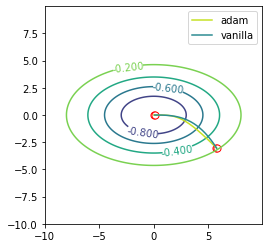

In [207]:
initp = np.random.uniform(low=-6, high=6, size=2)
points_vanila = grad_desc(tf, initp)
points_adam = adam(tf, initp)
print(f"Iterations\nvanilla:\t{len(points_vanila)}\nadam:   \t{len(points_adam)}")
display2D(tf, {'adam': points_adam, 'vanilla': points_vanila})
